# Model training

In the notebook, the created feature dataset is used to train a xgboost model. The created model is evaluated

In [1]:
import pandas as pd
import numpy as np
import xgboost as xgb
from xgboost.sklearn import XGBClassifier
from sklearn.metrics import mean_squared_error, confusion_matrix, accuracy_score, classification_report
from sklearn.model_selection import train_test_split

pd.set_option('mode.chained_assignment', None)

In [2]:
data_file = 'processed_data.csv'

In [3]:
data = pd.read_csv(data_file, usecols=[3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20])

In [4]:
X, y = data.iloc[:,:-1],data.iloc[:,-1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1337)

In [5]:
xgb = XGBClassifier(objective='multi:softprob',
              learning_rate=0.1, #so called `eta` value
              max_depth=14,
              min_child_weight=4,
              subsample= 0.5,
              n_estimators= 100,
              num_class= 5)

xgb.fit(X_train,
         y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
              max_depth=14, min_child_weight=4, missing=None, n_estimators=100,
              n_jobs=1, nthread=None, num_class=5, objective='multi:softprob',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              seed=None, silent=True, subsample=0.5)

In [6]:
preds = xgb.predict(X_test)

print(classification_report(y_test,preds))
print(accuracy_score(y_test,preds))
print(confusion_matrix(y_test,preds, labels=['car', 'walk', 'bike', 'train']))

              precision    recall  f1-score   support

        bike       0.77      0.64      0.70     10954
         car       0.87      0.76      0.81     33890
       train       0.79      0.55      0.65      2127
        walk       0.67      0.88      0.76     21694

    accuracy                           0.77     68665
   macro avg       0.77      0.71      0.73     68665
weighted avg       0.79      0.77      0.77     68665

0.7718342678220346
[[25740  6671  1188   291]
 [ 1740 19044   909     1]
 [ 1464  2426  7054    10]
 [  793   121    53  1160]]


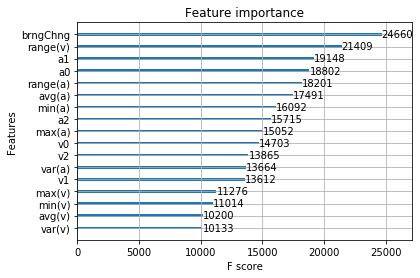

In [67]:
from xgboost import plot_importance
from matplotlib import pyplot
plot_importance(xgb)

In [66]:
import coremltools
coreml = coremltools.converters.xgboost.convert(xgb, 
                                                list(data.iloc[:,:-1].columns.values), 
                                                mode="classifier")
coreml.save('trans_mode.mlmodel')

In [9]:
import joblib
joblib.dump(xgb, "trans_mode.txt") 

['trans_mode.txt']

## TESTS

In [18]:
import joblib
xgb = joblib.load("trans_mode.txt")

In [65]:
coremltools.converters.xgboost.convert(xgb, list(data.iloc[:,:-1].columns.values), mode="classifier")

input {
  name: "v0"
  type {
    doubleType {
    }
  }
}
input {
  name: "v1"
  type {
    doubleType {
    }
  }
}
input {
  name: "v2"
  type {
    doubleType {
    }
  }
}
input {
  name: "a0"
  type {
    doubleType {
    }
  }
}
input {
  name: "a1"
  type {
    doubleType {
    }
  }
}
input {
  name: "a2"
  type {
    doubleType {
    }
  }
}
input {
  name: "max(a)"
  type {
    doubleType {
    }
  }
}
input {
  name: "min(a)"
  type {
    doubleType {
    }
  }
}
input {
  name: "range(a)"
  type {
    doubleType {
    }
  }
}
input {
  name: "avg(a)"
  type {
    doubleType {
    }
  }
}
input {
  name: "var(a)"
  type {
    doubleType {
    }
  }
}
input {
  name: "max(v)"
  type {
    doubleType {
    }
  }
}
input {
  name: "min(v)"
  type {
    doubleType {
    }
  }
}
input {
  name: "avg(v)"
  type {
    doubleType {
    }
  }
}
input {
  name: "var(v)"
  type {
    doubleType {
    }
  }
}
input {
  name: "range(v)"
  type {
    doubleType {
    }
  }
}
input {
  na

In [27]:
data_raw = pd.read_csv(data_file, usecols=[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20])

In [28]:
data_raw

,user,trans_trip,v0,v1,v2,a0,a1,a2,max(a),min(a),range(a),avg(a),var(a),max(v),min(v),avg(v),var(v),range(v),brngChng,class
0,106,0.0,4.317031,5.821819,7.165739,0.300958,0.191988,-0.276813,0.300958,-0.276813,0.577771,0.072044,-0.071738,7.165739,4.317031,5.768197,-7.999199,2.848708,27.799530,car
1,106,0.0,5.821819,7.165739,0.245416,0.191988,-0.276813,0.022692,0.191988,-0.276813,0.468801,-0.020711,0.044364,7.165739,0.245416,4.410991,-3.210786,6.920323,39.452352,car
2,106,0.0,7.165739,0.245416,1.289225,-0.276813,0.022692,0.015589,0.022692,-0.276813,0.299504,-0.079511,0.019547,7.165739,0.245416,2.900127,6.040477,6.920323,37.486847,car
3,106,0.0,6.744273,5.644308,5.993547,-0.137496,0.034924,0.100138,0.100138,-0.137496,0.237634,-0.000811,0.040032,6.744273,5.644308,6.127376,-10.312425,1.099964,19.156264,car
4,106,0.0,5.644308,5.993547,7.095069,0.034924,0.100138,0.220834,0.220834,0.034924,0.185910,0.118632,0.071370,7.095069,5.644308,6.244308,-10.491145,1.450760,9.108288,car
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
343318,86,0.0,6.745056,8.057947,7.970676,0.109408,-0.009697,0.063823,0.109408,-0.009697,0.119104,0.054511,0.022662,8.057947,6.745056,7.591226,-16.240736,1.312890,25.748830,car
343319,86,0.0,8.057947,7.970676,8.545079,-0.009697,0.063823,0.047273,0.063823,-0.009697,0.073519,0.033800,0.016308,8.545079,7.970676,8.191234,-19.494941,0.574403,1.333434,car
343320,86,0.0,7.970676,8.545079,9.443263,0.063823,0.047273,-0.637435,0.063823,-0.637435,0.701258,-0.175447,-0.187121,9.443263,7.970676,8.653006,-21.651342,1.472587,10.546353,car
343321,86,0.0,8.545079,9.443263,5.618650,0.047273,-0.637435,0.308895,0.308895,-0.637435,0.946330,-0.093756,0.205194,9.443263,5.618650,7.868997,-17.789024,3.824613,17.687351,car


In [57]:
trip = data_raw[(data_raw['user'] == 128) & (data_raw['trans_trip'] == 3)]

In [58]:
trip

,user,trans_trip,v0,v1,v2,a0,a1,a2,max(a),min(a),range(a),avg(a),var(a),max(v),min(v),avg(v),var(v),range(v),brngChng,class
294913,128,3.0,0.106756,1.779821,1.737215,0.012486,-0.000377,-0.044313,0.012486,-0.044313,0.056799,-0.010735,-0.014594,1.779821,0.106756,1.207931,0.605921,1.673064,40.376417,walk
294914,128,3.0,1.779821,1.737215,0.407815,-0.000377,-0.044313,0.226661,0.226661,-0.044313,0.270975,0.060657,0.079242,1.779821,0.407815,1.308284,-0.299154,1.372006,34.668267,walk
294915,128,3.0,1.784810,0.777027,1.333645,-0.004644,0.029296,-0.024543,0.029296,-0.024543,0.053839,0.000036,-0.007888,1.784810,0.777027,1.298494,0.051996,1.007783,32.138519,walk
294916,128,3.0,0.777027,1.333645,0.990037,0.029296,-0.024543,0.001593,0.029296,-0.024543,0.053839,0.002115,0.001013,1.333645,0.777027,1.033570,0.025877,0.556617,82.707015,walk
294917,128,3.0,1.333645,0.990037,1.020302,-0.024543,0.001593,0.006843,0.006843,-0.024543,0.031386,-0.005369,0.002410,1.333645,0.990037,1.114661,-0.052894,0.343608,63.930955,walk
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
294991,128,3.0,1.431874,1.421355,1.565635,-0.000097,0.006558,-0.001024,0.006558,-0.001024,0.007582,0.001813,-0.000334,1.565635,1.421355,1.472954,-0.199870,0.144280,3.397234,walk
294992,128,3.0,1.421355,1.565635,1.506268,0.006558,-0.001024,-0.001442,0.006558,-0.001442,0.008000,0.001364,-0.000470,1.565635,1.421355,1.497753,-0.242183,0.144280,3.397480,walk
294993,128,3.0,1.565635,1.506268,1.457237,-0.001024,-0.001442,-0.002853,-0.001024,-0.002853,0.001829,-0.001773,-0.000952,1.565635,1.457237,1.509713,-0.272953,0.108398,4.150203,walk
294994,128,3.0,1.506268,1.457237,1.137702,-0.001442,-0.002853,0.000618,0.000618,-0.002853,0.003471,-0.001226,0.000206,1.506268,1.137702,1.367069,-0.234556,0.368566,5.451224,walk


In [59]:
X_t, y_t = trip.iloc[:,2:-1],trip.iloc[:,-1]

In [60]:
X_t

,v0,v1,v2,a0,a1,a2,max(a),min(a),range(a),avg(a),var(a),max(v),min(v),avg(v),var(v),range(v),brngChng
294913,0.106756,1.779821,1.737215,0.012486,-0.000377,-0.044313,0.012486,-0.044313,0.056799,-0.010735,-0.014594,1.779821,0.106756,1.207931,0.605921,1.673064,40.376417
294914,1.779821,1.737215,0.407815,-0.000377,-0.044313,0.226661,0.226661,-0.044313,0.270975,0.060657,0.079242,1.779821,0.407815,1.308284,-0.299154,1.372006,34.668267
294915,1.784810,0.777027,1.333645,-0.004644,0.029296,-0.024543,0.029296,-0.024543,0.053839,0.000036,-0.007888,1.784810,0.777027,1.298494,0.051996,1.007783,32.138519
294916,0.777027,1.333645,0.990037,0.029296,-0.024543,0.001593,0.029296,-0.024543,0.053839,0.002115,0.001013,1.333645,0.777027,1.033570,0.025877,0.556617,82.707015
294917,1.333645,0.990037,1.020302,-0.024543,0.001593,0.006843,0.006843,-0.024543,0.031386,-0.005369,0.002410,1.333645,0.990037,1.114661,-0.052894,0.343608,63.930955
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
294991,1.431874,1.421355,1.565635,-0.000097,0.006558,-0.001024,0.006558,-0.001024,0.007582,0.001813,-0.000334,1.565635,1.421355,1.472954,-0.199870,0.144280,3.397234
294992,1.421355,1.565635,1.506268,0.006558,-0.001024,-0.001442,0.006558,-0.001442,0.008000,0.001364,-0.000470,1.565635,1.421355,1.497753,-0.242183,0.144280,3.397480
294993,1.565635,1.506268,1.457237,-0.001024,-0.001442,-0.002853,-0.001024,-0.002853,0.001829,-0.001773,-0.000952,1.565635,1.457237,1.509713,-0.272953,0.108398,4.150203
294994,1.506268,1.457237,1.137702,-0.001442,-0.002853,0.000618,0.000618,-0.002853,0.003471,-0.001226,0.000206,1.506268,1.137702,1.367069,-0.234556,0.368566,5.451224


In [61]:
preds = xgb.predict(X_t)